To run a query on the champions database in R, use the following scheme.

- title: "Starter notebook to query data from Lumin API and plot a Heatmap"
- author: "Margaret Paiva"
- date: "11/10/2021"
- output: R notebook

In [1]:
# install.packages(c("httr", "jsonlite", "rjson", "data.table", "viridis"))

In [2]:
# Install the above packages if any of the following librares cannot be loaded
library(httr)
library(jsonlite)
library(rjson)
library(dplyr)
library(data.table)
library(ggplot2)
library(viridis)


Attaching package: ‘rjson’


The following objects are masked from ‘package:jsonlite’:

    fromJSON, toJSON



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: viridisLite



In [3]:
# Define the data to query
data  <- list("request_data_type" = "expression",
  "request_cancer_type" = list("all"),
  "request_genes" = c("ATM", "BRCA1", "BRCA2", "BRIP1", 
                      "CDK12", "CHEK2", "FANCA", "HDAC2", 
                      "KRAS", "PALB2", "SRY", "TP53", "NOTCH1"),
  "request_models" = c("CTG-0009", "CTG-0011", "CTG-0012", 
                       "CTG-0017", "CTG-0018", "CTG-0019", "CTG-0033"),
  "request_dataset" = "PDX",
  "request_key" = "d787ddc1e45f4ac2b68ac43419500515",
  "request_client" = 99,
  "request_user" = 99,
  "request_mode" = 'true') 

In [4]:
request  <-  POST(url = 'https://lumin-fast-api.championsoncology.com/workstation', 
                  body = data, encode = 'json')
request
# A successful request will give "Status: 200"

Response [https://lumin-fast-api.championsoncology.com/workstation]
  Date: 2021-10-11 20:38
  Status: 200
  Content-Type: application/json
  Size: 75 B


In [5]:
# This will save the data file as a .json file in your root directory
response <- content(request)
response

[1] "success, the file you may view your requested data in your root directory"

In [6]:
# Enter the file name of the .json file in your root directory below
lt = fromJSON(file = "../requested_data---11-10-2021---19:16:03.json")

In [7]:
# Create a dataframe from the data
df  <- do.call(rbind, lapply(lt, rbind))
df  <- as.data.frame(df)
df

v1,gene_id,log.rsem.rpkm,log.tpm,z,fold,trans,model,sort_key,gene,model_name,tumor_type
<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
54725,ENSG00000012048,2.75866371659715,3.74181592469265,-0.751531639773822,0.833794342322239,ENST00000357654:55.59% ENST00000591534:10.61%,CTG-0017,CTG-0017_Expression_1,BRCA1,CTG-0017,Breast
55993,ENSG00000083093,2.71681207513467,3.69941003545083,-0.864175018181405,0.864074252601595,ENST00000261584:87.13% ENST00000566069:10.39%,CTG-0017,CTG-0017_Expression_1,PALB2,CTG-0017,Breast
61045,ENSG00000133703,4.1841138372329,5.24828725359662,0.276535810709039,1.06202851963049,ENST00000311936:88.24% ENST00000256078:10.91%,CTG-0017,CTG-0017_Expression_1,KRAS,CTG-0017,Breast
61534,ENSG00000136492,2.50465843671125,3.46768122172572,0.174826501045492,1.05334146074465,ENST00000259008:88.05%,CTG-0017,CTG-0017_Expression_1,BRIP1,CTG-0017,Breast
62086,ENSG00000139618,2.20808214596516,3.13164744824684,-0.318489086837266,0.901977073529102,ENST00000380152:64.74% ENST00000533776:22.61%,CTG-0017,CTG-0017_Expression_1,BRCA2,CTG-0017,Breast
62361,ENSG00000141510,6.76211130078036,7.86552058012619,1.71152007503072,1.57022130185769,ENST00000269305:83.86%,CTG-0017,CTG-0017_Expression_1,TP53,CTG-0017,Breast
63285,ENSG00000148400,4.94309547396269,6.02511216954956,1.82459236368767,1.86579075842366,ENST00000277541:98.85%,CTG-0017,CTG-0017_Expression_1,NOTCH1,CTG-0017,Breast
63388,ENSG00000149311,2.88908457987527,3.88173065735901,-0.658454950242792,0.835919147972645,ENST00000527891:24.45% ENST00000278616:16.62% ENST00000527181:14.98% ENST00000452508:11.09%,CTG-0017,CTG-0017_Expression_1,ATM,CTG-0017,Breast
66129,ENSG00000167258,3.07900804559688,4.08646964826869,-1.55072134119572,0.742590636864214,ENST00000447079:36.89% ENST00000430627:22.61% ENST00000584632:22.51%,CTG-0017,CTG-0017_Expression_1,CDK12,CTG-0017,Breast


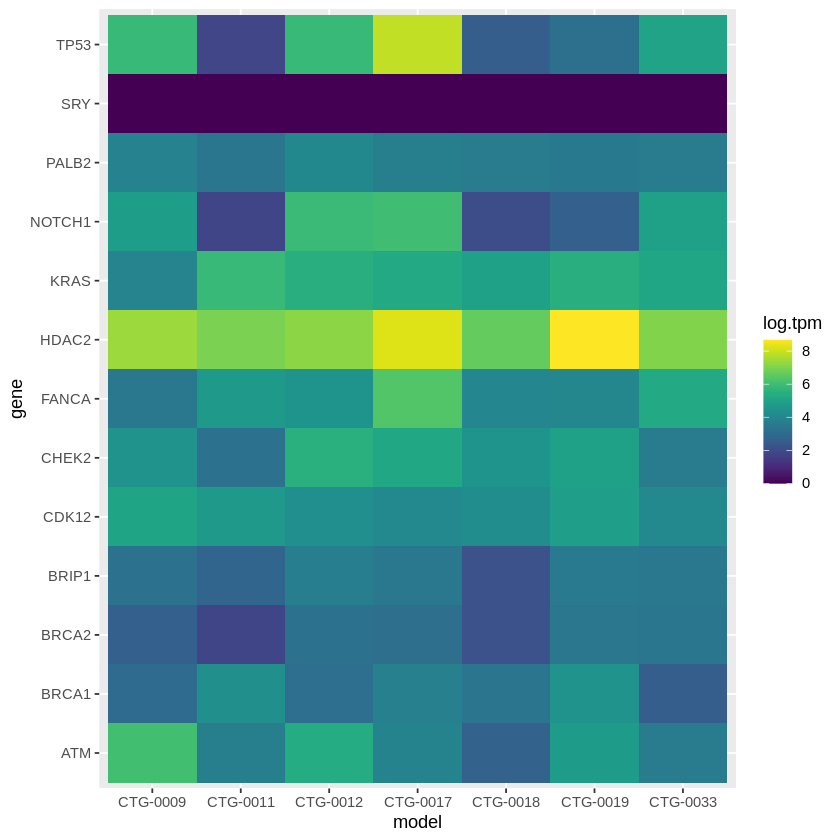

In [8]:
# Set the data type before plotting
df$gene  <- as.character(df$gene)
df$model  <- as.character(df$model)
df$log.tpm  <- as.numeric(df$log.tpm)
# Plot a heatmap
ggplot(df, aes(x = model, y = gene, fill = log.tpm)) +
  geom_tile() +
  scale_fill_viridis()